In [16]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자
# matplotlib.rcParams['font.family'] = 'AppleGothic Gothic' # Mac사용자
matplotlib.rcParams['font.size'] = '10' # 글자크기

In [17]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [18]:
train_input.shape

(60000, 28, 28)

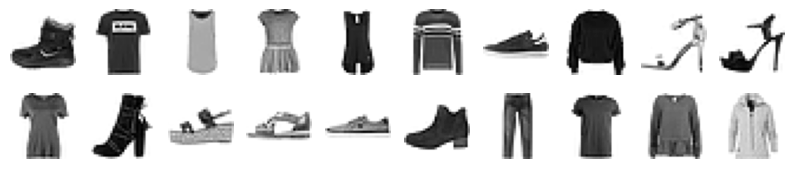

In [19]:
# fig,axs = plt.subplots(1,10, figsize=(10,4))
# for i in range(10):
#     axs[i].imshow(train_input[i], cmap='gray_r')
#     axs[i].axis('off')
# plt.show()


# 두줄 형태로 출력
fig,axs = plt.subplots(2,10, figsize=(10,2))
for i in range(2):    
    for j in range(10):
        axs[i, j].imshow(train_input[10*i+j], cmap='gray_r')
        axs[i, j].axis('off')
plt.show()

In [20]:
# 표준화작업 
# train_scaled =  train_input/255 # --> 2차원 배열 ==> 3차원 배열로 바꿔주어야 함.
# 1차원 행렬로 변경
# train_scaled = train_scaled.reshape(-1,28*28) 

# 합성곱 신경망은 3차원 행렬이 되어야 함.
train_scaled = train_input.reshape(-1,28,28,1)/255


In [21]:
# train 세트 : train, 검증세트, test세트로 구분

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

In [22]:
train_scaled.shape

(48000, 28, 28, 1)

1차 합성곱 층을 생성

In [7]:
# 1차 합성곱 신경망
model = keras.Sequential()
# padding = 'same' : 패딩 사용  ==> 사이즈 크게 하기 위해
# padding = 'valid' : 패딩 사용 하지 않음 ==> 패딩이 절반으로 줄어듬.
# input_shape=(28,28,1) : 사이즈 28,28, 그레이 색상 1, (28,28,3) : 사이즈 28*28, RGB 색상 3개
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same',
        input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2)) 

c:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2차 합성곱 층을 생성

In [8]:
# 2차 합성곱 신경망 생성
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [9]:
model.add(keras.layers.Flatten()) # 1차원 행렬
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10,activation='softmax'))

In [10]:
model.summary()

# conv2d param 사이즈 = kernel_size(3,3) * 깊이(1) * 필터(32개) +32개 절편 = 3*3*1*32+32 = 320
# MaxPooling2D : 사이즈가 절반으로 변경
# Flatten : 1차원 행렬 14*14*35 = 6275


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       313,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 모델설정 옵티마이저 - adam
# model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# 콜백모델 체크포인트 checkpoint_cb = keras.callbacks.ModelCheckpoint('best_model.keras')
# 조기종료 early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
# 모델훈련 history = model.fit(train_scaled,train_target,batch_size=32,epochs=20,
#                   validation_data(val_scaled, val_target),
#                   callbacks=[checkpoint_cb, early_stopping_cb])
# 모델평가 model.evaluate(val_scaled,val_target)

In [28]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('cnn_model.keras')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, batch_size=32, epochs=20,
                    validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.7421 - loss: 0.7181 - val_accuracy: 0.8841 - val_loss: 0.3203
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.8713 - loss: 0.3554 - val_accuracy: 0.8927 - val_loss: 0.2866
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.8921 - loss: 0.2948 - val_accuracy: 0.9057 - val_loss: 0.2486
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9060 - loss: 0.2616 - val_accuracy: 0.9144 - val_loss: 0.2342
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9136 - loss: 0.2380 - val_accuracy: 0.9128 - val_loss: 0.2377
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9207 - loss: 0.2166 - val_accuracy: 0.9196 - val_loss: 0.2229
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9254 - loss: 0.1989 - val_accuracy: 0.9153 - val_loss: 0.2341
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9347 - loss:

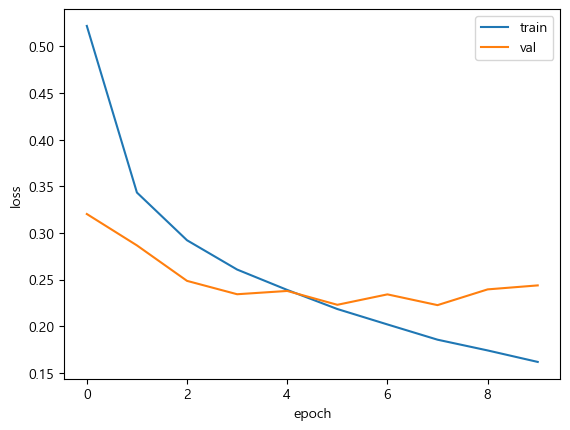

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [32]:
# stop 위치 출력 
early_stopping_cb.stopped_epoch

9

In [31]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9219 - loss: 0.2166


[0.22252695262432098, 0.9200000166893005]

In [34]:
val_scaled[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [35]:
val_scaled[0].reshape(28,28)


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00784314,
        0.01568627, 0.        , 0.        , 0.57647059, 0.49019608,
        0.41568627, 0.4431

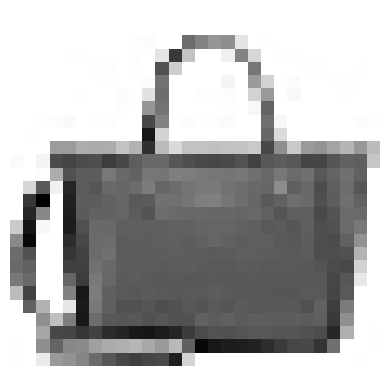

In [47]:
plt.imshow(val_scaled[0].reshape(28,28), cmap='gray_r')
plt.axis('off')
plt.show()

In [36]:
predict = model.predict(val_scaled[0:1]) # 3차원 행렬 형태
print(predict)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
[[2.5577196e-18 1.6958669e-31 7.7528858e-23 5.5740205e-23 5.8776134e-26
  3.2932406e-22 5.5614584e-19 4.4478926e-25 1.0000000e+00 3.9786503e-24]]


In [37]:
predict[0]

array([2.5577196e-18, 1.6958669e-31, 7.7528858e-23, 5.5740205e-23,
       5.8776134e-26, 3.2932406e-22, 5.5614584e-19, 4.4478926e-25,
       1.0000000e+00, 3.9786503e-24], dtype=float32)

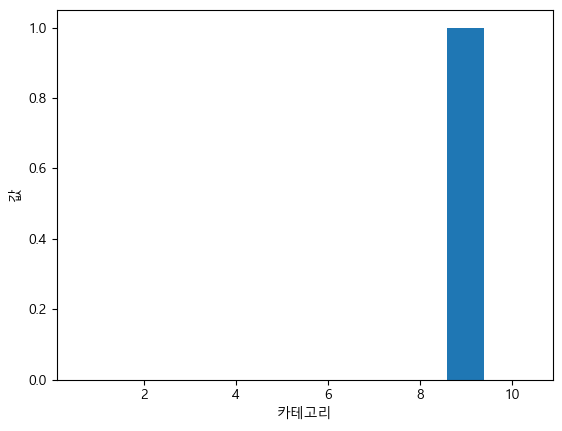

In [39]:
plt.bar(range(1,11),predict[0])
plt.xlabel('카테고리')
plt.ylabel('값')
plt.show()

In [40]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵글부츠']

In [41]:
print(classes[np.argmax(predict)]) # np.argmax : 최대값의 index값을 리턴

가방


In [42]:
# test 세트 검증 : 3차원행렬로 변경해서 test 진행해야 함.
test_scaled = test_input.reshape(-1, 28, 28, 1)/255.0

In [43]:
# test 세트 정확도 
model.evaluate(test_scaled, test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9127 - loss: 0.2593


[0.25001853704452515, 0.9124000072479248]

In [24]:
# keras.utils.plot_model(model)

In [23]:
# keras.utils.plot_model(model, show_shapes=True, to_file='cnn_a.png', dpi=300)

In [12]:
# 스트라이드 : 슬라이딩을 이동할 때 2칸씩 이동 ==> 패딩을 시켜도 절반으로 줄어
# strides = 1 : 슬라이딩 이동할 때 1칸씩 이동, 값 안 넣으면 1(default)
# 풀링 : 특성맵을 절반으로 줄임
  # 최대 풀링 : 겹치는 것이 없도록 움직임. 많이 사용, 가장 특성을 잘 발휘한 것 뽑아서 다시 훈련
  # 평균 풀링


In [13]:
# 딥러닝 훈련 : 인공신경망 (ANN)
# 데이터 전처리 train_scaled = train_input.reshape(-1,28,28,1)/255

# 모델결정 model = keras.Sequential()

# 합성곱 신경망 (CNN)
# 1차 합성곱 신경망 
# model.add(keras.layer.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same'), input_shape=(28,28,1))
# 최대풀링 model.add(keras.layers.MaxPooling2D(2)) 
# 2차 합성곱 신경망
# model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
# model.add(keras.layers.MaxPooling2D(2))

# 인공신경망 훈련
# model.add(keras.layers.Flatten()) # 1차원 행렬
# model.add(keras.layers.Dense(100,activation='relu'))
# model.add(keras.layers.Dropout(0.4)) # 40%를 제외시키는규제 적용
# model.add(keras.layers.Dense(10,activation='softmax'))

# Flatten 추가  model.add(keras.layers.Flatten(input_shape=(28,28))) # 1차원으로 변환
# Dense층 추가  model.add(keras.layers.Dense(100,activation='relu'))
# 드롭아웃추가  model.add(keras.layers.Dropout(0.3)) # 30%를 제외시키는 규제적용
# Dense층 추가  model.add(keras.layers.Dense(10,activation='softmax'))
# 모델 구성 확인 model.summary()
# 모델설정 옵티마이저 - adam
# model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# 콜백모델 체크포인트 checkpoint_cb = keras.callbacks.ModelCheckpoint('best_model.keras')
# 조기종료 early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
# 모델훈련 history = model.fit(train_scaled,train_target,batch_size=32,epochs=20,
#                   validation_data(val_scaled, val_target),
#                   callbacks=[checkpoint_cb, early_stopping_cb])
# 모델평가 model.evaluate(val_scaled,val_target)

# test 세트 검증 : 3차원행렬로 변경해서 test 진행해야 함.
# test_scaled = test_input.reshape(-1, 28, 28, 1)/255.0
# test 세트 정확도 model.evaluate(test_scaled, test_target)

In [ ]:
# [ 최종 ]
# 딥러닝 훈련
# 모델결정 model = keras.Sequential()
# 합성곱 신경망 (CNN)
# 1차 합성곱 신경망
# model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',padding='same'),
#                                input_shape=(28,28,1))
# 최대풀링 model.add(keras.layers.MaxPooling2D(2))
# 2차 합성곱 신경망
# model.add( keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu',padding='same') )
# model.add(keras.layers.MaxPooling2D(2))
# model.add(keras.layers.Flatten()) # 1차원행렬
# model.add(keras.layers.Dense(100,activation='relu'))
# model.add(keras.layers.Dropout(0.4))
# model.add(keras.layers.Dense(10,activation='softmax'))
# Flatten 추가  model.add(keras.layers.Flatten(input_shape=(28,28)))
# Dense층 추가  model.add(keras.layers.Dense(100,activation='relu'))
# 드롭아웃추가  model.add(keras.layers.Dropout(0.3)) # 30%를 제외시키는 규제적용
# Dense층 추가  model.add(keras.layers.Dense(10,activation='softmax'))
# 모델설정 옵티마이저 - adam
# model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# 콜백모델체크포인트 checkpoint_cb = keras.callbacks.ModelCheckpoint('best_model.keras')
# 종기종료 early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True )
# 모델훈련 history = model.fit(train_scaled,train_target,batch_size=32,epochs=20,
#                      validation_data=(val_scaled,val_target), callbacks=[checkpoint_cb,early_stopping_cb])
# 모델평가 model.evaluate(val_scaled,val_target)